# Regresión logística

Análisis de regresión, se usa para predecir el resultado de una variable categórica en función a otras variables independiente.

Sirve para modelar la probabilidad de que un evento pueda ocurrir en función de otros factores

Es un método de clasificación.

## Matriz de confusión

Sirve para evaluar nuestro modelo de regresión

-La presición sirve para saber la probabilidad de acierto en la prediccion
Presicion = (Positivos correctos + Negativos correctos) / Total

-La tasa de error  sirve para saber la probabilidad de error en la prediccion
Tasa de error = (Falsos positivos + Falsos negativos) / Total


## Ejemplo

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
cd data_sets

E:\Sergio\Documentos\Programacion\Python\Udemy Machine Free\data_sets


In [3]:
entrenamiento = pd.read_csv('train.csv')
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

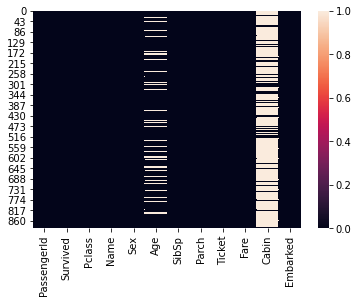

In [4]:
sns.heatmap(entrenamiento.isnull())

<AxesSubplot:ylabel='Frequency'>

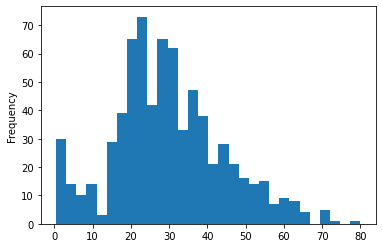

In [5]:
entrenamiento['Age'].plot.hist(bins=30)

## Limpieza de datos

<AxesSubplot:>

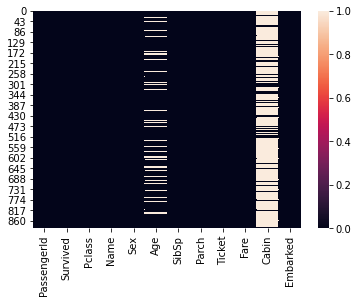

In [6]:
entrenamiento.isnull()
sns.heatmap(entrenamiento.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

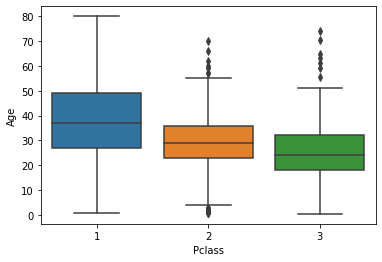

In [7]:
sns.boxplot(x='Pclass',y='Age',data=entrenamiento)

In [8]:
def edad_media(columnas):
    edad = columnas[0]
    clase = columnas[1]
    if pd.isnull(edad):
        if clase == 1:
            return 38
        elif clase == 2:
            return 30
        else:
            return 25
    else:
        return edad


In [9]:
entrenamiento['Age'] = entrenamiento[['Age','Pclass']].apply(edad_media, axis=1)

<AxesSubplot:>

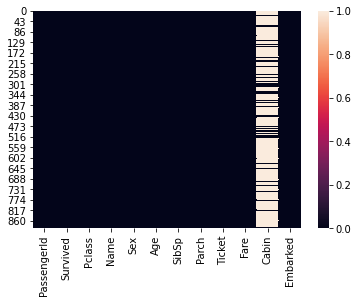

In [10]:
entrenamiento.isnull()
sns.heatmap(entrenamiento.isnull())

In [11]:
entrenamiento.drop(['Cabin'],axis=1,inplace=True)

<AxesSubplot:>

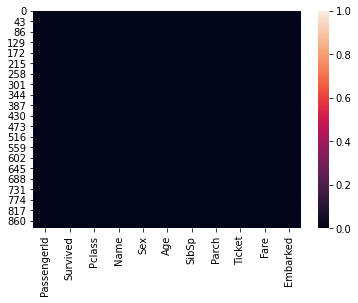

In [12]:
entrenamiento.isnull()
sns.heatmap(entrenamiento.isnull())

In [13]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
entrenamiento.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [15]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
sexo = pd.get_dummies(entrenamiento['Sex'])

In [17]:
entrenamiento = pd.concat([entrenamiento, sexo],axis = 1)

In [18]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [19]:
entrenamiento.drop('Sex',axis=1,inplace=True)

In [20]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


In [21]:
puerto = pd.get_dummies(entrenamiento['Embarked'],drop_first=True)

In [22]:
puerto

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [23]:
entrenamiento = pd.concat([entrenamiento, puerto],axis = 1)

In [24]:
entrenamiento

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,Q,S
0,0,3,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,38.0,1,0,71.2833,C,1,0,0,0
2,1,3,26.0,0,0,7.9250,S,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,1,0,0,1
4,0,3,35.0,0,0,8.0500,S,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,1,0,1
887,1,1,19.0,0,0,30.0000,S,1,0,0,1
888,0,3,25.0,1,2,23.4500,S,1,0,0,1
889,1,1,26.0,0,0,30.0000,C,0,1,0,0


In [25]:
entrenamiento.drop('Embarked',axis=1,inplace=True)

In [26]:
entrenamiento

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,1
888,0,3,25.0,1,2,23.4500,1,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,0,0


## Entrenamiento

In [27]:
y = entrenamiento['Survived']

In [28]:
X = entrenamiento.drop('Survived',axis = 1)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [31]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(X_train,y_train)

C:\Users\NüVO Gamer Station\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [32]:
predicciones = modelo.predict(X_test)

In [33]:
predicciones

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [34]:
y_test

248    1
197    0
133    1
169    0
736    0
      ..
422    0
815    0
466    0
559    1
6      0
Name: Survived, Length: 268, dtype: int64

## Evaluacion

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       178
           1       0.73      0.77      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



In [37]:
confusion_matrix(y_test,predicciones)

array([[153,  25],
       [ 21,  69]], dtype=int64)